In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

In [52]:
df = pd.read_csv('data/Quote-Equity-NETF-EQ-12-11-2023-to-12-11-2024.csv', thousands=',')
df2 = pd.read_csv('data/Quote-Equity-ITBEES-EQ-12-11-2023-to-12-11-2024.csv', thousands=',')
df3 = pd.read_csv('data/Quote-Equity-KOTAKBKETF-EQ-12-11-2023-to-12-11-2024.csv', thousands=',')
df4 = pd.read_csv('data/Quote-Equity-LICNFNHGP-EQ-12-11-2023-to-12-11-2024.csv', thousands=',')
df5 = pd.read_csv('data/Quote-Equity-NEXT50IETF-EQ-12-11-2023-to-12-11-2024.csv', thousands=',')

In [53]:
dfs = [df, df2, df3, df4, df5]
combined_df = pd.concat(dfs, ignore_index=True)

In [54]:
combined_df['Date '] = pd.to_datetime(combined_df['Date '].str.strip())

In [25]:
datasets = ['NETF', 'ITBEES', 'KOTAKBKETF', 'LICNFNHGP', 'NEXT50IETF']
for i, data in enumerate(dfs):
    data['Dataset'] = datasets[i]
combined_df = pd.concat(dfs, ignore_index=True)

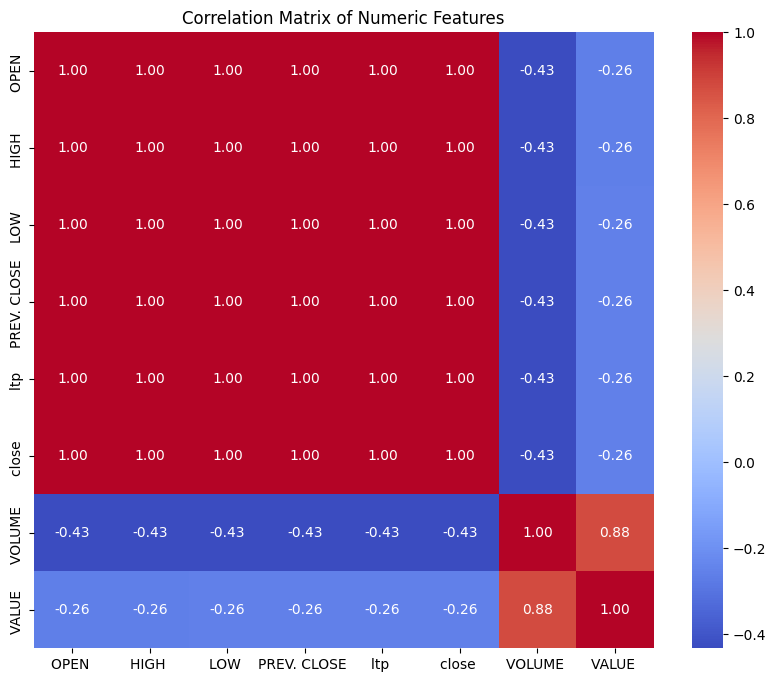

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'VOLUME ', 'VALUE ']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

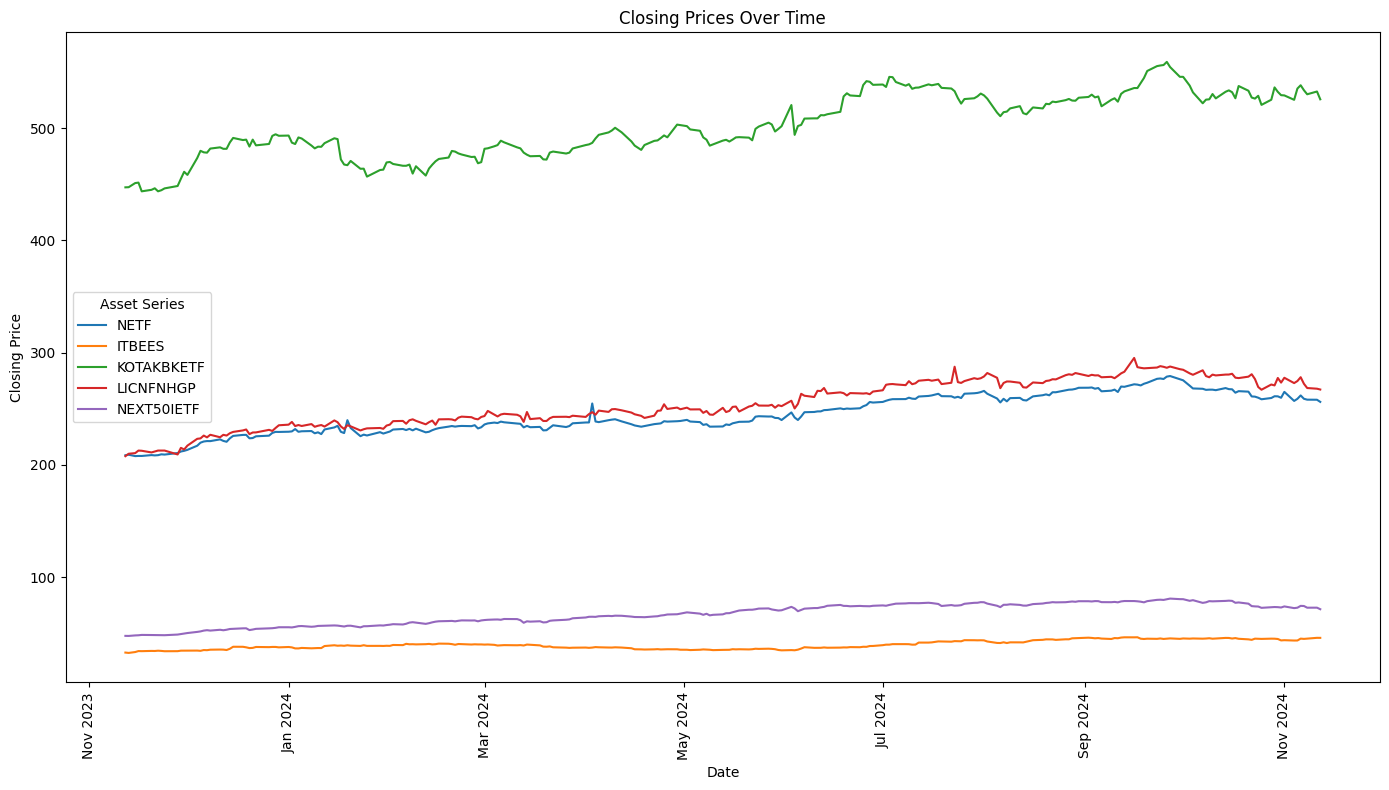

In [42]:
plt.figure(figsize=(14, 8))
for dataset in datasets:
    df_subset = combined_df[combined_df['Dataset'] == dataset]
    plt.plot(df_subset['Date '], df_subset['close '], label=dataset)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Adjust the interval (e.g., every 2 months)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(title="Asset Series")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

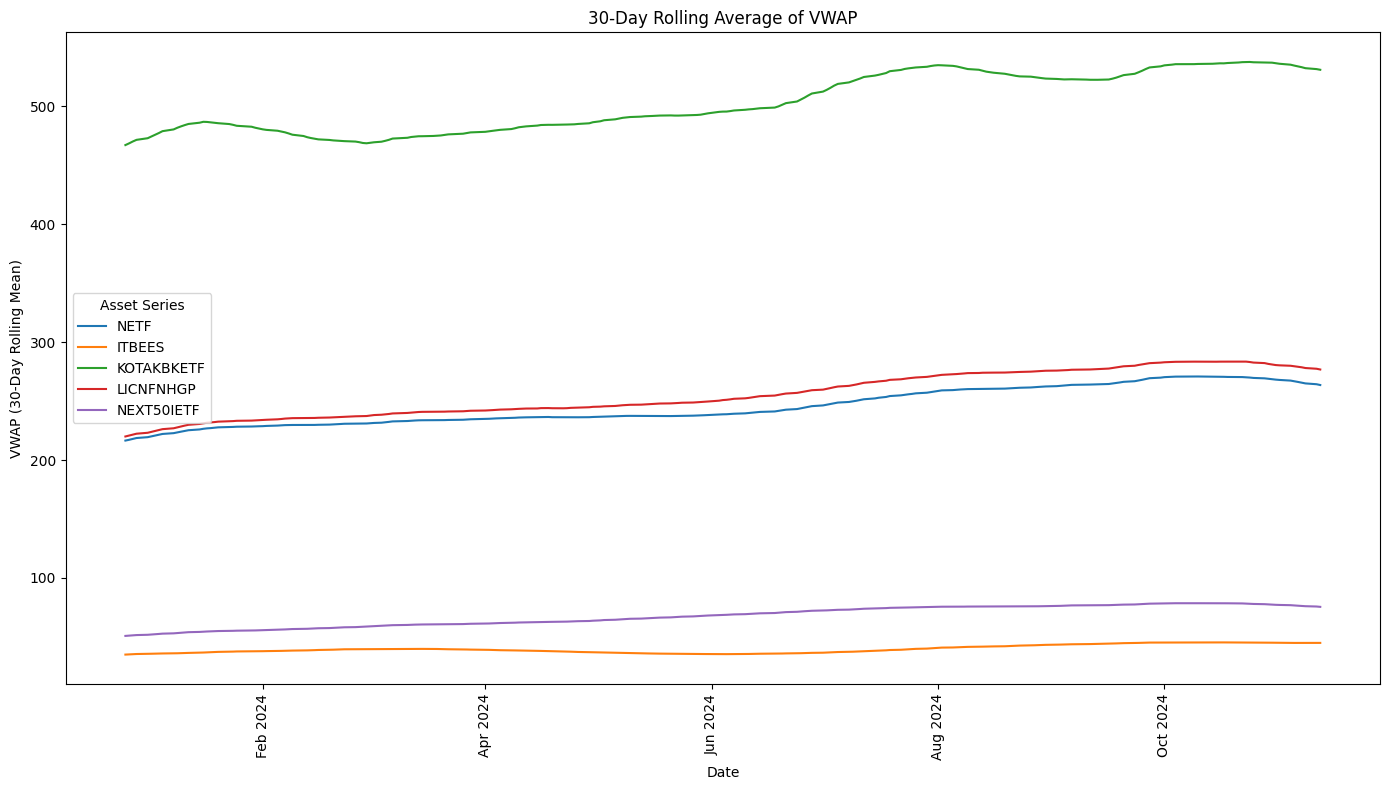

In [44]:
plt.figure(figsize=(14, 8))
for dataset in datasets:
    df_subset = combined_df[combined_df['Dataset'] == dataset]
    df_subset = df_subset.sort_values(by='Date ')
    plt.plot(df_subset['Date '], df_subset['vwap '].rolling(window=30).mean(), label=dataset)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Adjust the interval (e.g., every 2 months)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.title("30-Day Rolling Average of VWAP")
plt.xlabel("Date")
plt.ylabel("VWAP (30-Day Rolling Mean)")
plt.legend(title="Asset Series")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

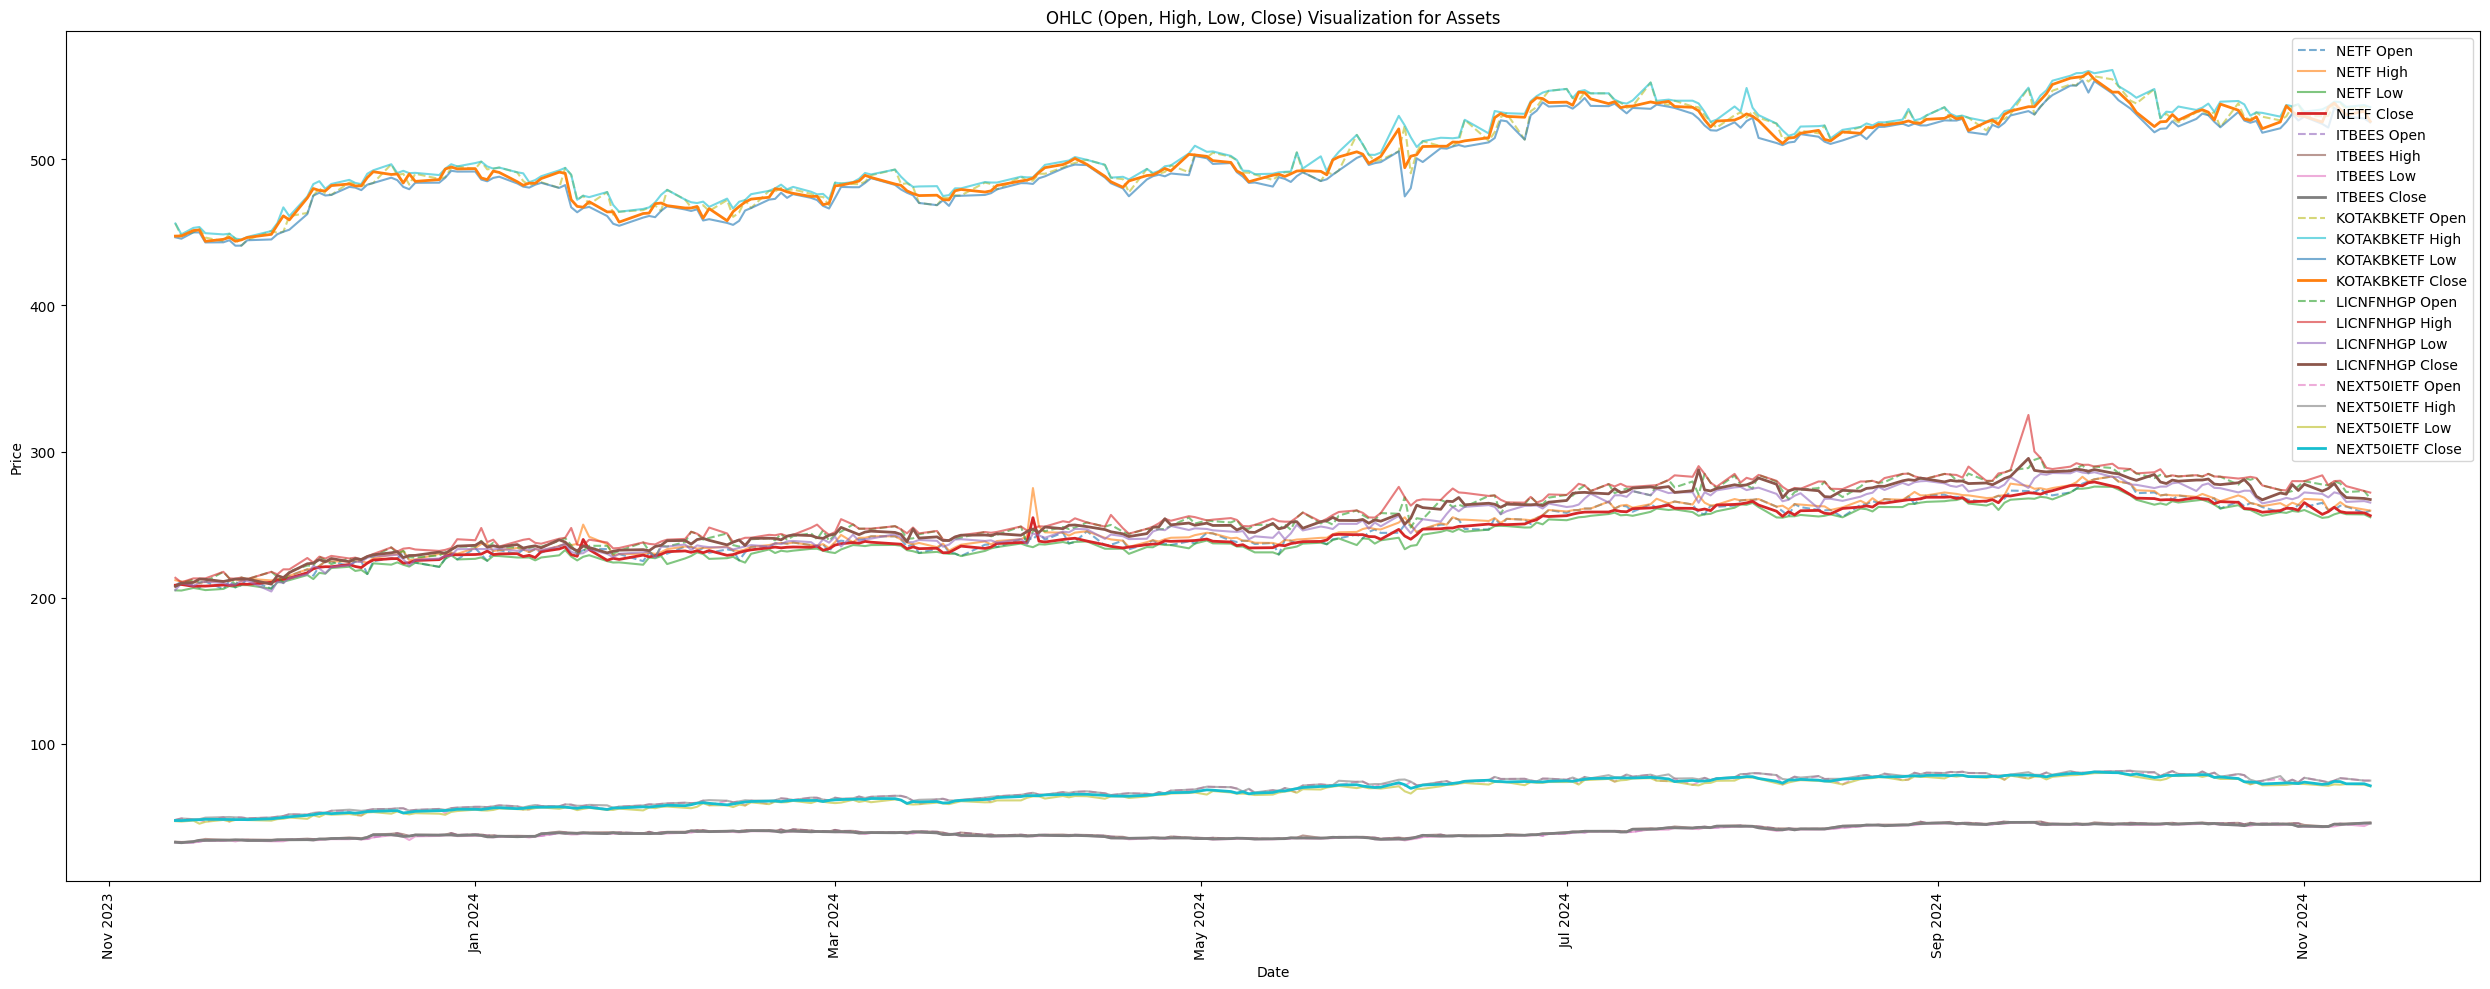

In [45]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(25, 10))
for dataset in datasets:
    df_subset = combined_df[combined_df['Dataset'] == dataset].sort_values(by='Date ')
    ax.plot(df_subset['Date '], df_subset['OPEN '], label=f"{dataset} Open", linestyle='--', alpha=0.6)
    ax.plot(df_subset['Date '], df_subset['HIGH '], label=f"{dataset} High", alpha=0.6)
    ax.plot(df_subset['Date '], df_subset['LOW '], label=f"{dataset} Low", alpha=0.6)
    ax.plot(df_subset['Date '], df_subset['close '], label=f"{dataset} Close", linewidth=2)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.set_title("OHLC (Open, High, Low, Close) Visualization for Assets")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Adjust the interval (e.g., every 2 months)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

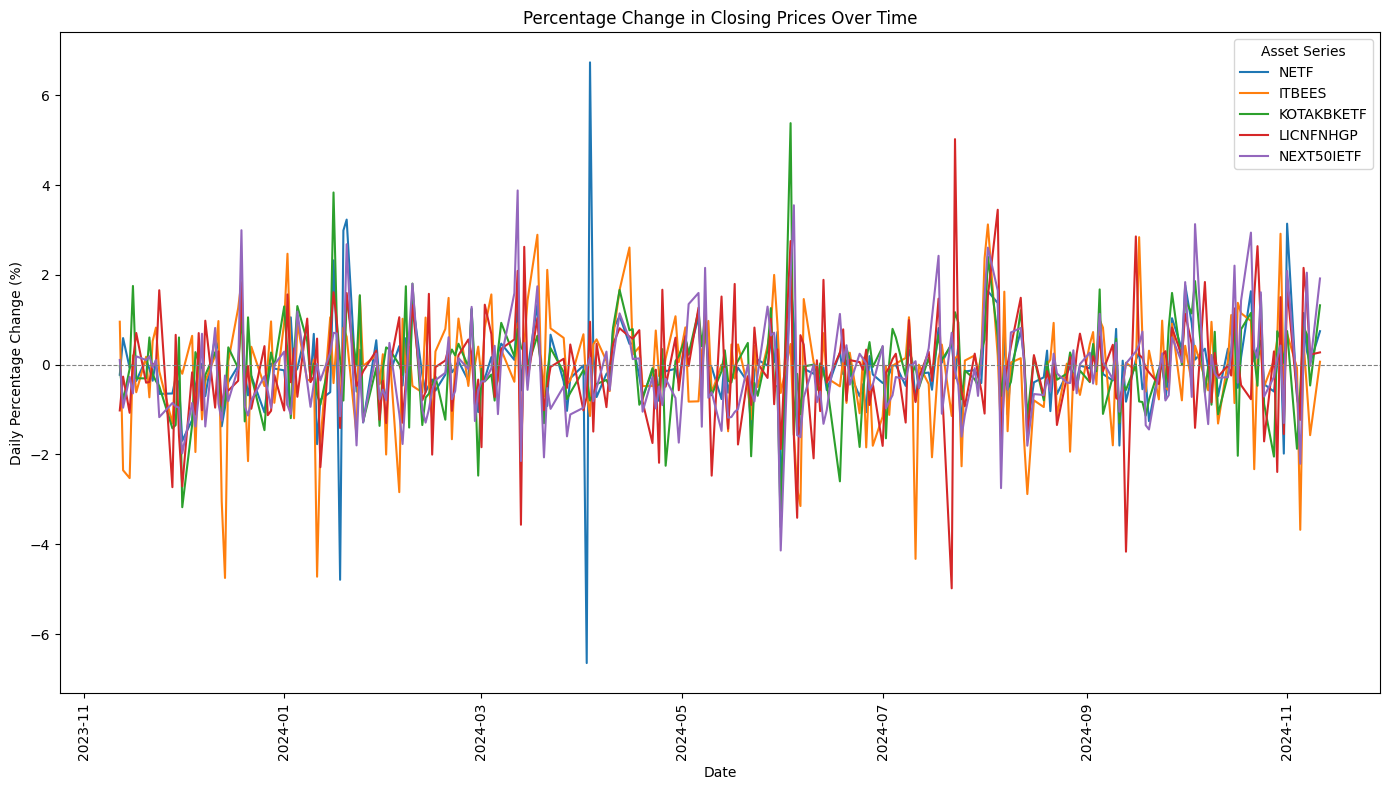

In [48]:
plt.figure(figsize=(14, 8))
for dataset in datasets:
    df_subset = combined_df[combined_df['Dataset'] == dataset].copy()
    df_subset['Daily Return'] = df_subset['close '].pct_change() * 100  # Calculate daily percentage change
    plt.plot(df_subset['Date '], df_subset['Daily Return'], label=dataset)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Percentage Change in Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change (%)")
plt.legend(title="Asset Series")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

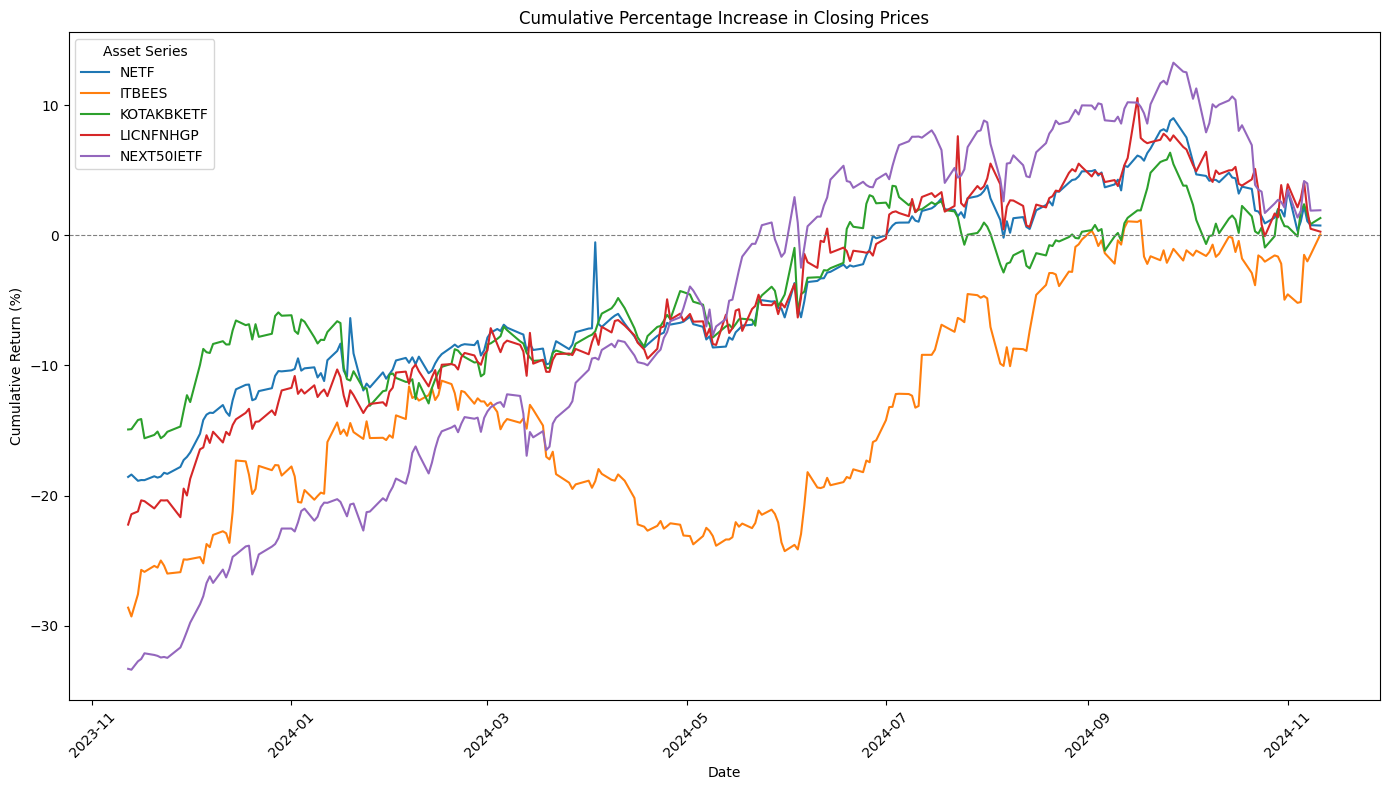

In [49]:
plt.figure(figsize=(14, 8))
for dataset in datasets:
    df_subset = combined_df[combined_df['Dataset'] == dataset].copy()
    df_subset['Cumulative Return'] = ((1 + df_subset['close '].pct_change()).cumprod() - 1) * 100  # Cumulative return
    plt.plot(df_subset['Date '], df_subset['Cumulative Return'], label=dataset)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Cumulative Percentage Increase in Closing Prices")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.legend(title="Asset Series")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

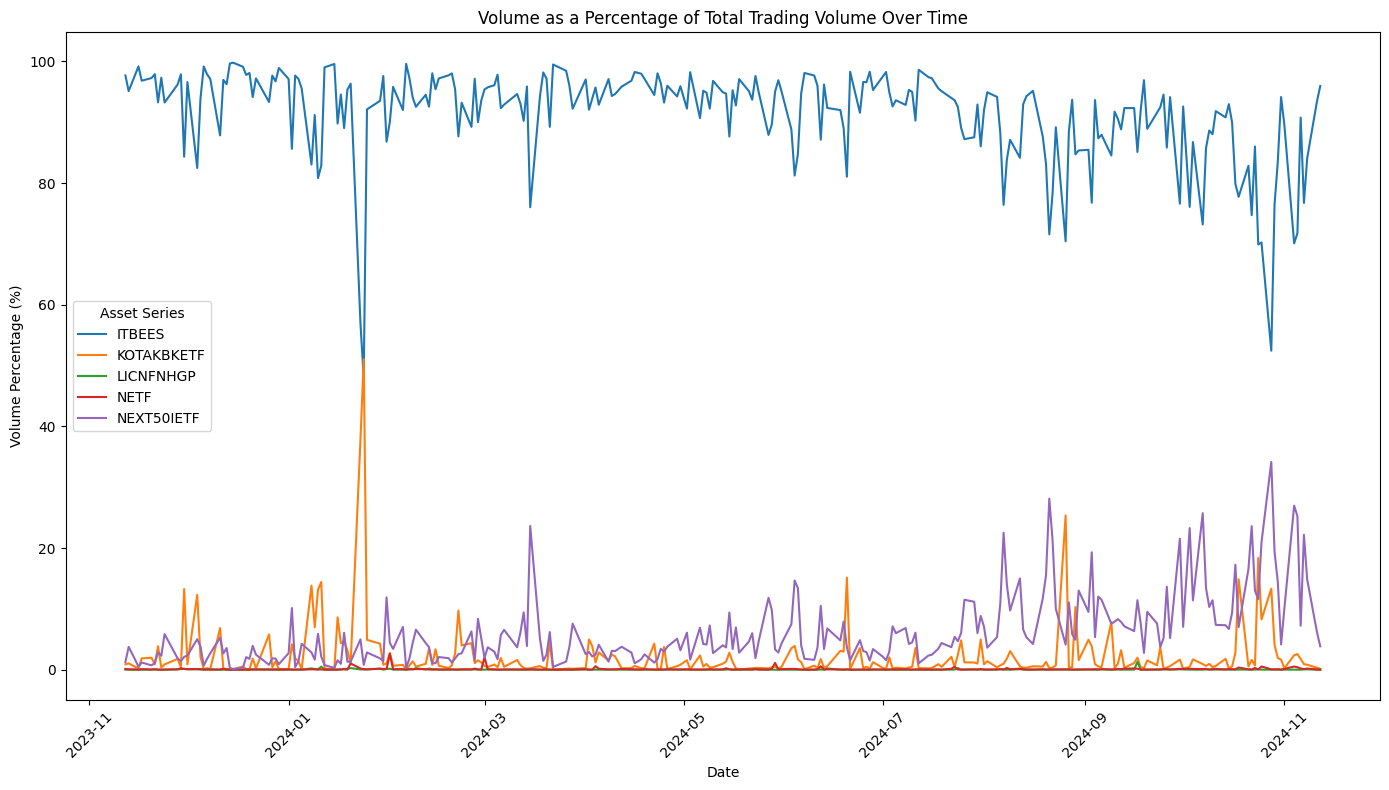

In [50]:
volume_agg = combined_df.groupby(['Date ', 'Dataset'])['VOLUME '].sum().reset_index()
volume_agg['Total Volume'] = volume_agg.groupby('Date ')['VOLUME '].transform('sum')
volume_agg['Volume %'] = (volume_agg['VOLUME '] / volume_agg['Total Volume']) * 100

plt.figure(figsize=(14, 8))
sns.lineplot(data=volume_agg, x='Date ', y='Volume %', hue='Dataset')
plt.title("Volume as a Percentage of Total Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume Percentage (%)")
plt.legend(title="Asset Series")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()